In [1]:
import os
import random
import cv2 as cv
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from IPython import get_ipython
import nbformat
from PIL import Image
import math

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_path = '/content/drive/MyDrive/new/Animals'

In [4]:
%pwd

'/content'

In [5]:
catagories = []
for c in os.listdir(data_path):
    catagories.append(c)
print(catagories)

['Lion', 'Cheetah', 'Jaguar', 'Leopard', 'Tiger']


In [6]:
data = []
for c in catagories:
  # Absolute path of each img by joining class name
  path = os.path.join(data_path, c)

  # getting class num by index of per catagory
  class_num = catagories.index(c)

  for img in tqdm(os.listdir(path)):

    # Gray scale image reading

    img_arr = cv.imread(os.path.join(path, img), cv.IMREAD_GRAYSCALE)

    # Resizing image using bilinear interpolation(40x40)
    img_arr = cv.resize(img_arr, (32, 32), interpolation=cv.INTER_AREA)

    # Appending image array and class num to data
    data.append([img_arr, class_num])

print(len(data))

100%|██████████| 39/39 [00:10<00:00,  3.57it/s]

170


In [7]:
random.shuffle(data)

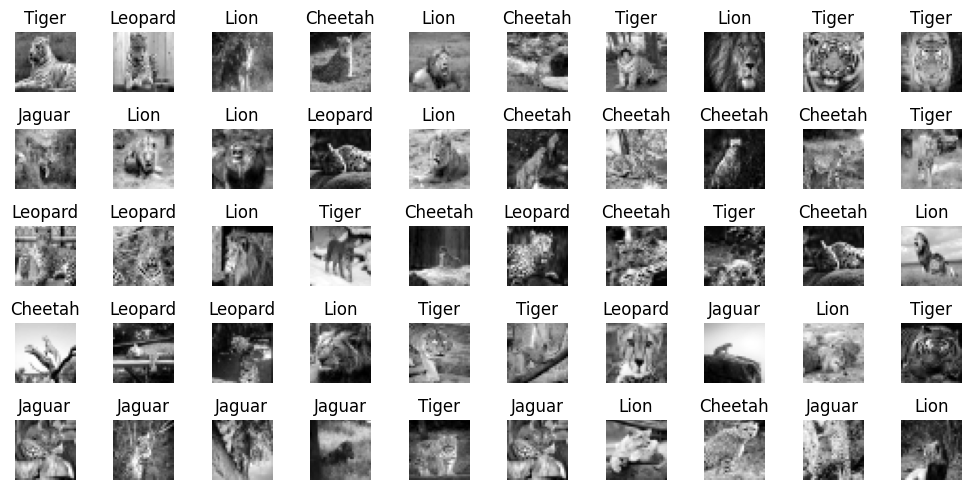

In [16]:
# Showing the first 50 images(Display images with their labels)
plt.figure(figsize=(10, 5))

for i in range(50):
  plt.subplot(5, 10, i+1)
  plt.imshow(data[i][0], cmap='gray')
  plt.title(catagories[data[i][1]])
  plt.axis('off')

plt.tight_layout()

plt.show()

In [17]:
#L1 and L2 distance

def calc_l1_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))

def calc_l2_distance(x1, x2):
    return np.sqrt(np.sum(np.abs(x1 - x2)**2))

In [18]:
k_max = 30
def calc_distance(train, val):

  # To reacieve distances

  l1_result = []
  l2_result = []

  for v in tqdm(val):
    temp = []
    for t in train:
      temp.append([v[1],  t[1], {"l1": calc_l1_distance(v[0], t[0]), "l2": calc_l2_distance(v[0], t[0])}])

    temp.sort(key=lambda x: x[2]["l1"])
    l1_result.append(temp[:k_max])

    temp.sort(key=lambda x: x[2]["l2"])
    l2_result.append(temp[:k_max])


  return [l1_result, l2_result]

In [19]:
k_max = 30

def calc_accuracy(distance_val, distance_label):
    k_acc = []
    for k in range(1, k_max+1):
        img_acc = 0

        for img_dist in distance_val:
            top_k = img_dist[:k]
            same_class_img = [t_k for t_k in top_k if t_k[0] == t_k[1]]

            if k % 2 != 0:
                if (k // 2) < len(same_class_img):
                    img_acc += 1

            else:
                diff_class_img = [t_k for t_k in top_k if t_k[0] != t_k[1]]
                if len(same_class_img) > len(diff_class_img):
                    img_acc += 1

                elif len(same_class_img) == len(diff_class_img):
                    same_class_dist = sum([s_c[2][distance_label] for s_c in same_class_img])
                    diff_class_dist = sum([d_c[2][distance_label] for d_c in diff_class_img])

                    if same_class_dist > diff_class_dist:
                        img_acc += 1

        k_acc.append(img_acc/len(distance_val))

    return k_acc

In [20]:
f1 = data[0:34]
f2 = data[34:68]
f3 = data[68:104]
f4 = data[104:138]
f5 = data[138:169]

In [21]:
print(len(f1))

34


In [22]:
print("Length of f1:", len(f1))
print("Length of f2:", len(f2))
print("Length of f3:", len(f3))
print("Length of f4:", len(f4))
print("Length of f5:", len(f5))

Length of f1: 34
Length of f2: 34
Length of f3: 36
Length of f4: 34
Length of f5: 31


In [23]:
fold_distance = []

for i in range(1,6):

    if i == 1:
        train = f1 + f2 + f3 + f4
        validation = f5

    elif i == 2:
        train = f1 + f2 + f3 + f5
        validation = f4

    elif i == 3:

        train = f1 + f2 + f4 + f5
        validation = f3

    elif i == 4:
        train = f1 + f3 + f4 + f5
        validation = f2

    elif i == 5:
        train = f2 + f3 + f4 + f5
        validation = f1

    fold_distance.append(calc_distance(train, validation))

len(fold_distance[0][0])

100%|██████████| 34/34 [00:00<00:00, 473.36it/s]


31

PLOTING

In [24]:
accuracies = []
for result in fold_distance:
    l1_accuracy = calc_accuracy(result[0], "l1")
    l2_accuracy = calc_accuracy(result[1], "l2")
    accuracies.append([l1_accuracy, l2_accuracy])

accuracies

[[[0.16129032258064516,
   0.16129032258064516,
   0.12903225806451613,
   0.0967741935483871,
   0.03225806451612903,
   0.0967741935483871,
   0.03225806451612903,
   0.06451612903225806,
   0.06451612903225806,
   0.06451612903225806,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0],
  [0.25806451612903225,
   0.0967741935483871,
   0.12903225806451613,
   0.06451612903225806,
   0.0967741935483871,
   0.0967741935483871,
   0.06451612903225806,
   0.06451612903225806,
   0.03225806451612903,
   0.03225806451612903,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0]],
 [[0.23529411764705882,
   0.35294117647058826,
   0.20588235294117646,
   0.2647058823529412,
   0.08823529411764706,
   0.029411764705882353,
   0.029411764705882353,
   0.0,
   0.0,
   0.0,
   0.0294

L1 ACCURACY

Max Accuracy for L1 in fold=1 is : 0.1613
Max Accuracy for L1 in fold=2 is : 0.3529
Max Accuracy for L1 in fold=3 is : 0.3333
Max Accuracy for L1 in fold=4 is : 0.2059
Max Accuracy for L1 in fold=5 is : 0.2353


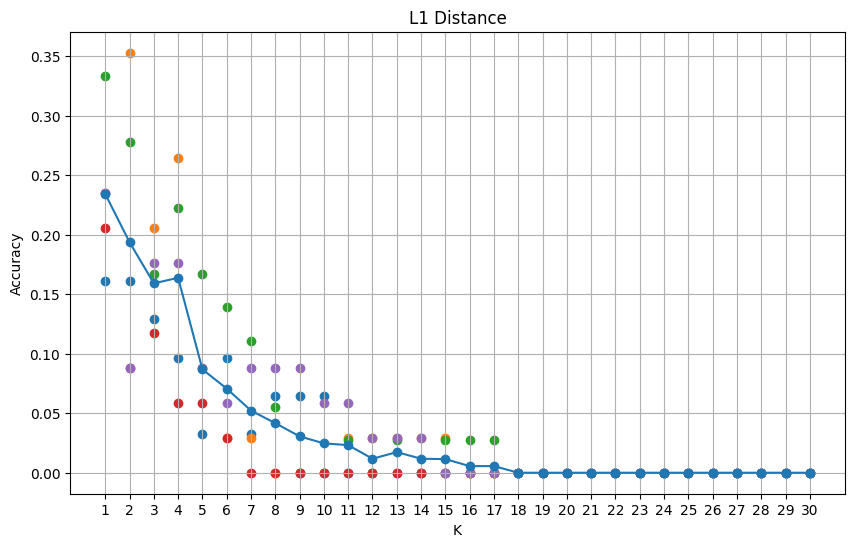

In [25]:
i = 1

for fold in accuracies:
  y = fold[0]
  max_val = [round(y, 4) for y in y]
  print(f"Max Accuracy for L1 in fold={i} is : {max(max_val)}")

  i += 1

x_list = list(range(1, k_max+1))
plt.figure(figsize=(10, 6))

for fold in accuracies:
  y_list = fold[0]
  numbers = y_list
  plt.scatter(x_list, y_list)


arr = []
for i in range(k_max):
  arr.append([fold[0][i] for fold in accuracies])

trend = [np.mean(a) for a in arr]

plt.errorbar(x_list, trend, fmt='-o')
plt.title('L1 Distance')

# Sets (K values) the X-axis ticks to the values in x_list.

plt.xticks(x_list)

# For better readability Enables a grid.

plt.grid(True)
plt.xlabel('K')
plt.ylabel('Accuracy')

plt.show()

L2 ACCURACY

Max Accuracy for L2 in fold=1 is : 0.2581
Max Accuracy for L2 in fold=2 is : 0.2353
Max Accuracy for L2 in fold=3 is : 0.25
Max Accuracy for L2 in fold=4 is : 0.2353
Max Accuracy for L2 in fold=5 is : 0.3529


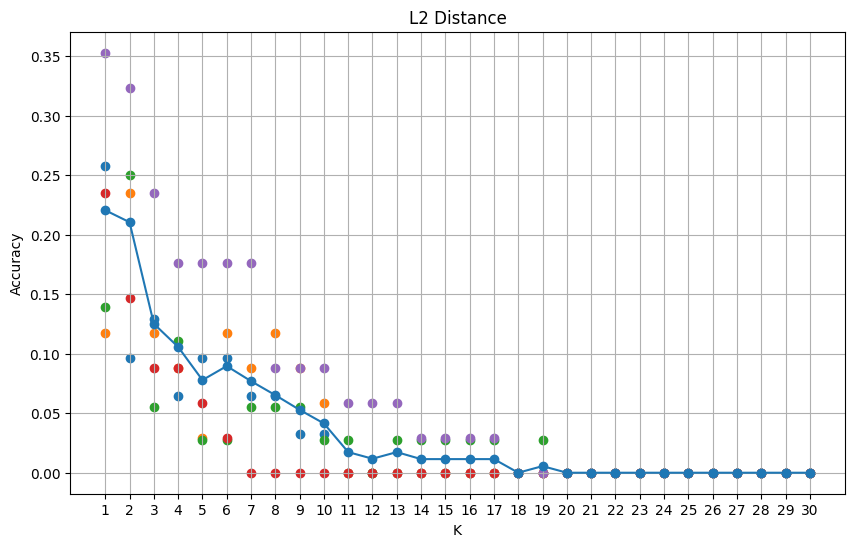

In [26]:
i = 1

for fold in accuracies:

  y = fold[1]
  max_val = [round(y, 4) for y in y]
  print(f"Max Accuracy for L2 in fold={i} is : {max(max_val)}")

  i += 1

x_list = list(range(1, k_max+1))
plt.figure(figsize=(10, 6))

for fold in accuracies:

  y_list = fold[1]
  numbers = y_list
  plt.scatter(x_list, y_list)


arr = []
for i in range(k_max):
  arr.append([fold[1][i] for fold in accuracies])
trend = [np.mean(a) for a in arr]

plt.errorbar(x_list, trend, fmt='-o')
plt.title('L2 Distance')

# Sets (K values) the X-axis to the values in x_list.

plt.xticks(x_list)

# For better readability enables a grid.

plt.grid(True)
plt.xlabel('K')
plt.ylabel('Accuracy')

plt.show()


PREDICTION OF TOP 5

L1

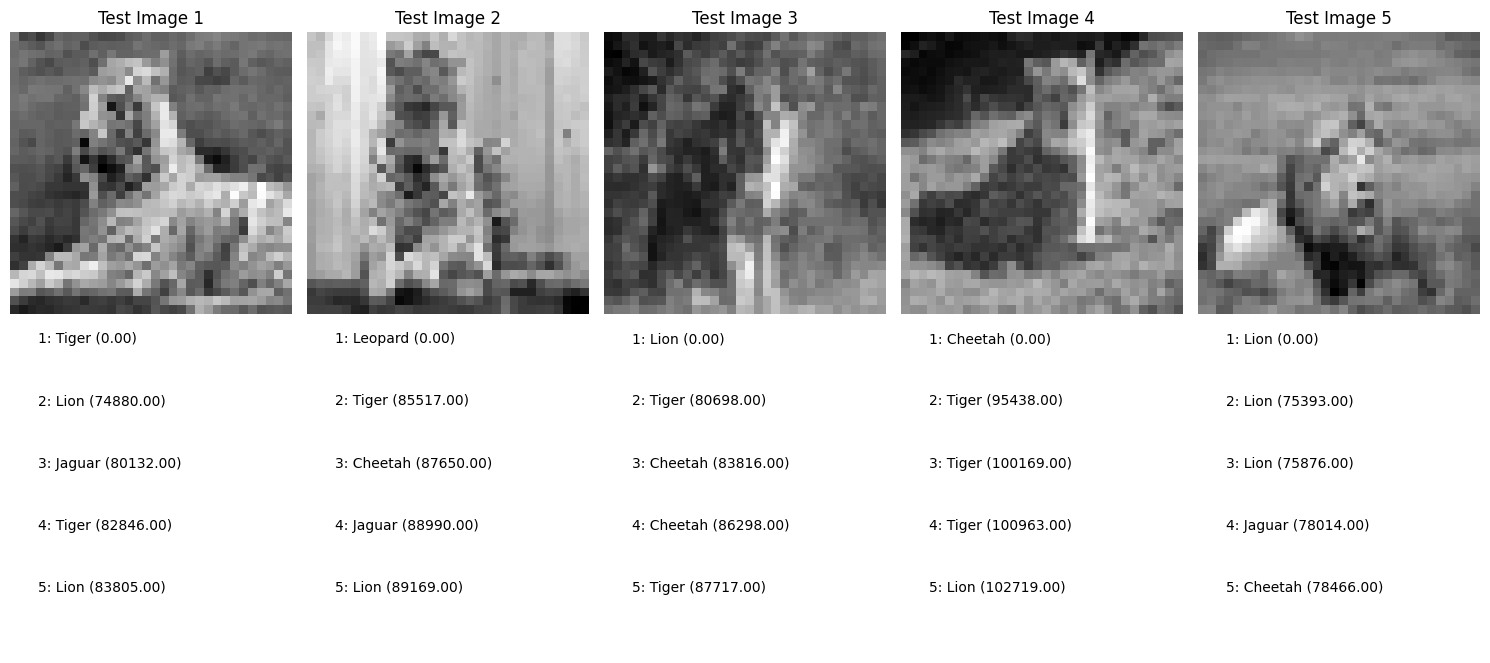

In [27]:
test_data = []

for i in range(100):
    test_data.append(data[i][0])

def display_top_5_predictions(test_data, data, categories):
    plt.figure(figsize=(15, 10))

    for idx, img in enumerate(test_data[:5]):

        # Calculate L1 distances between the test image and all training images

        distance1 = []

        for train_img, class_num in data:
            distance1.append([class_num, calc_l1_distance(img, train_img)])

        # L1 distance sorted

        distance1.sort(key=lambda x: x[1])

        # Top 5 nearest neighbors
        top_5_predictions = distance1[:5]

        # The original test image

        plt.subplot(3, 5, idx + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f"Test Image {idx+1}")
        plt.axis('off')

        for i, (class_num, d) in enumerate(top_5_predictions):
            plt.subplot(3, 5, 5 + idx + 1)
            plt.text(0.1, 1 - 0.2 * i, f"{i+1}: {categories[class_num]} ({d:.2f})", fontsize=10)
            plt.axis('off')

    plt.tight_layout()

    plt.show()

display_top_5_predictions(test_data, data, catagories)

L2

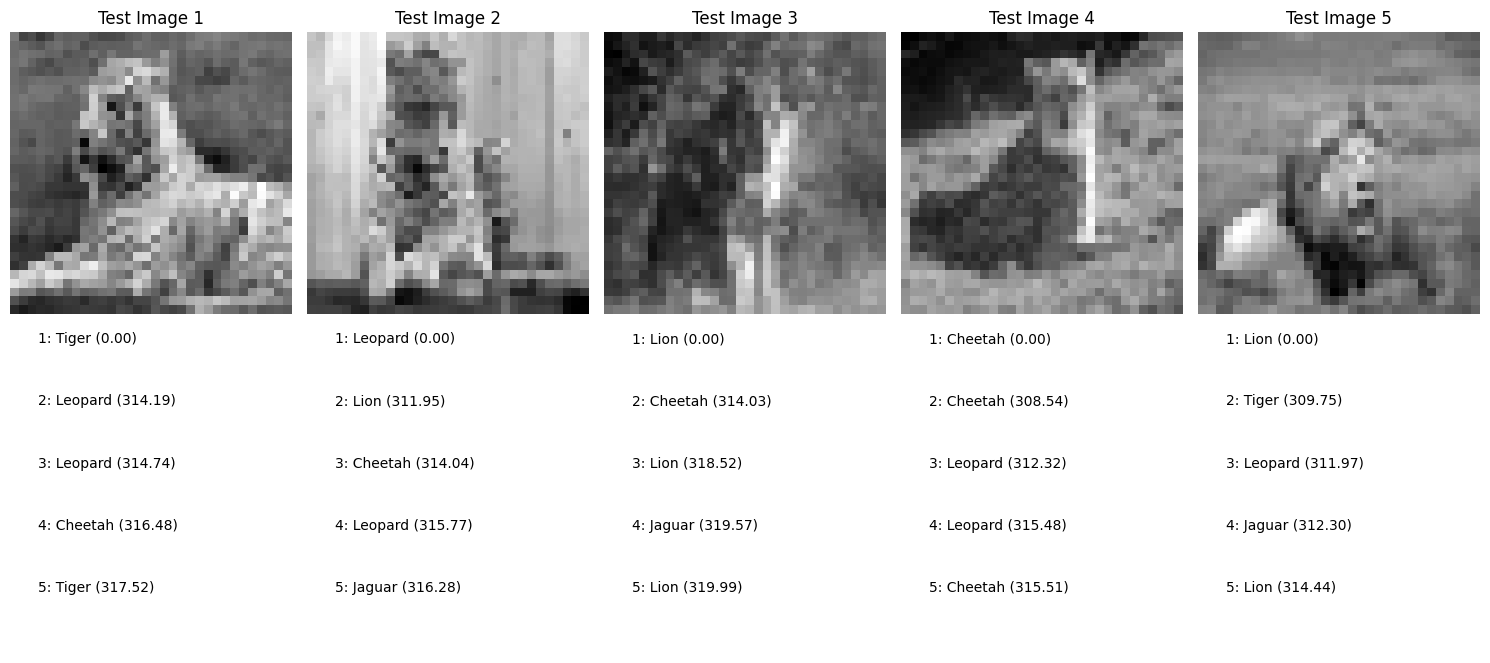

In [28]:
test_data = []

for i in range(100):
    test_data.append(data[i][0])

def display_top_5_predictions(test_data, data, categories):
    plt.figure(figsize=(15, 10))

    for idx, img in enumerate(test_data[:5]):

        # Calculate L1 distances between the test image and all training images

        distance2 = []

        for train_img, class_num in data:
            distance2.append([class_num, calc_l2_distance(img, train_img)])

        # L1 distance sorted

        distance2.sort(key=lambda x: x[1])

        # Top 5 nearest neighbors

        top_5_predictions = distance2[:5]

        # The original test images ploting

        plt.subplot(3, 5, idx + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f"Test Image {idx+1}")
        plt.axis('off')

        for i, (class_num, d) in enumerate(top_5_predictions):
            plt.subplot(3, 5, 5 + idx + 1)
            plt.text(0.1, 1 - 0.2 * i, f"{i+1}: {categories[class_num]} ({d:.2f})", fontsize=10)
            plt.axis('off')

    plt.tight_layout()

    plt.show()

display_top_5_predictions(test_data, data, catagories)
